 ## HW3 - Land Use and Land Cover Classification

In this homework your task is to implement machine learning and deep learning models to solve a typical problem in satellite imaging  using a benchmark dataset. The homework was designed to make you work on increasingly more complex models. We hope that the homework will be very helpful to improve your skills and knowledge!


### S1:

- Visit the EuroSAT data description page and download the data: https://github.com/phelber/eurosat

- Split the data into training (60%) and testing sets (40%), stratified on class labels (equal percentage of each class type in train and test sets).

- Convert each RGB image to grayscale and flatten the images into a data matrix (n x p: n = #samples, p = #pixels in each image)

- What is the data size for training and testing data?

In [ ]:
import pandas as pd
import numpy as np
import os
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def process_dataset(base_path):
    data_matrix = []
    labels = []

    for class_dir in sorted(os.listdir(base_path)):  # Ensure consistent order
        class_path = os.path.join(base_path, class_dir)
        if os.path.isdir(class_path):
            for image_file in sorted(os.listdir(class_path)):
                if image_file.lower().endswith(('.jpg')):
                    image_path = os.path.join(class_path, image_file)
                    # Open the image file, convert to grayscale, flatten, and append to the list
                    with Image.open(image_path) as img:
                        img_array = np.array(img.convert('L')) / 255.0  # Scale pixel values
                        img_array = img_array.flatten()  # Flatten the array if necessary
                        data_matrix.append(img_array)
                        labels.append(class_dir)
                    # with Image.open(image_path) as img:
                    #     img_array = np.array(img.convert('L')).flatten()
                    #     data_matrix.append(img_array)
                    #     labels.append(class_dir)

    return np.array(data_matrix), np.array(labels)

# Define the base paths for your training and test datasets
base_train_path = '/content/drive/My Drive/MUSA650/Data/EuroSAT/train'
base_test_path = '/content/drive/My Drive/MUSA650/Data/EuroSAT/test'

# Process the datasets
train_data_matrix, train_labels = process_dataset(base_train_path)
test_data_matrix, test_labels = process_dataset(base_test_path)

# Output the sizes of the datasets
print("Training Data Size:", train_data_matrix.shape, "Labels:", train_labels)
print("Testing Data Size:", test_data_matrix.shape,"Labels:", test_labels)

Training Data Size: (16218, 4096) Labels: ['AnnualCrop' 'AnnualCrop' 'AnnualCrop' ... 'SeaLake' 'SeaLake' 'SeaLake']
Testing Data Size: (10812, 4096) Labels: ['AnnualCrop' 'AnnualCrop' 'AnnualCrop' ... 'SeaLake' 'SeaLake' 'SeaLake']


### Traditional machine learning models

### S2:

- Implement a first learning model (M.1) using a linear SVM classifier  

Q2.1: Calculate classification accuracy on the test data.

Q2.2: What is the number of parameters that the SVM model learns?


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
train_data_matrix

array([[0.3372549 , 0.34117647, 0.33333333, ..., 0.6627451 , 0.6745098 ,
        0.68235294],
       [0.48235294, 0.48235294, 0.47843137, ..., 0.45882353, 0.45098039,
        0.45098039],
       [0.52156863, 0.52156863, 0.51764706, ..., 0.3372549 , 0.34117647,
        0.33333333],
       ...,
       [0.23921569, 0.23921569, 0.23921569, ..., 0.2627451 , 0.27058824,
        0.2745098 ],
       [0.34117647, 0.34117647, 0.34117647, ..., 0.3372549 , 0.34117647,
        0.3372549 ],
       [0.2       , 0.2       , 0.2       , ..., 0.19607843, 0.19607843,
        0.19607843]])

In [ ]:
train_labels

array(['AnnualCrop', 'AnnualCrop', 'AnnualCrop', ..., 'SeaLake',
       'SeaLake', 'SeaLake'], dtype='<U20')

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_data_matrix)
X_test_scaled = scaler.transform(test_data_matrix)

In [ ]:
X_train_scaled

array([[-0.20746621, -0.17986736, -0.23246052, ...,  1.90117864,
         1.9789324 ,  2.03690173],
       [ 0.79297913,  0.7936945 ,  0.76821132, ...,  0.56301088,
         0.51325961,  0.51711137],
       [ 1.06336976,  1.06412836,  1.03866316, ..., -0.23474297,
        -0.20672001, -0.25566338],
       ...,
       [-0.88344279, -0.88299537, -0.88154495, ..., -0.72368888,
        -0.66956405, -0.64205076],
       [-0.18042714, -0.17986736, -0.17837015, ..., -0.23474297,
        -0.20672001, -0.22990422],
       [-1.15383342, -1.15342922, -1.1519968 , ..., -1.1611668 ,
        -1.15812165, -1.15723393]])

In [ ]:
X_test_scaled

array([[ 0.95521351,  0.95595482,  0.93048243, ...,  0.09979897,
         0.10184269,  0.130724  ],
       [-0.26154433, -0.26099751, -0.28655089, ...,  1.10342478,
         1.10467144,  1.1868495 ],
       [ 2.41532292,  2.41629761,  2.47205795, ...,  1.87544464,
         1.72179683,  1.54747772],
       ...,
       [-1.3160678 , -1.31568953, -1.34131309, ..., -1.34130477,
        -1.31240299, -1.31178888],
       [-0.72120841, -0.72073506, -0.71927384, ..., -0.69795489,
        -0.66956405, -0.66780992],
       [ 0.2251588 ,  0.19874003,  0.20026244, ...,  0.07406497,
         0.07612913,  0.05344652]])

In [ ]:
# Create a linear SVM classifier
svm_classifier = SVC(kernel='linear')

# Train the classifier using the training data and labels
S2= svm_classifier.fit(X_train_scaled, train_labels)

# Make predictions on the test data
svm_pred = svm_classifier.predict(X_test_scaled)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(test_labels, svm_pred)

print(f"Classification accuracy on the test data: {accuracy}")

Classification accuracy on the test data: 0.31761006289308175


### S3:

- Implement a second learning model (M.2) using a Random Forest classifier  

Q3.1: Calculate classification accuracy on the test data.  

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier using the training data and labels
S3= rf_classifier.fit(X_train_scaled, train_labels)

# Make predictions on the test data
rf_pred = rf_classifier.predict(X_test_scaled)

# Calculate the accuracy of the predictions
accuracy_rf = accuracy_score(test_labels, rf_pred)

print(f"Classification accuracy on the test data with Random Forest: {accuracy_rf}")

Classification accuracy on the test data with Random Forest: 0.5607658157602664


### Fully connected deep learning models

### S4:

- Implement a deep learning model (M.3) using a fully connected network with a single fully connected layer (i.e: input layer + fully connected layer as the output layer).

Q4.1: Plot the network architecture (using functions provided by Keras)

Q4.2: What is the number of learnable parameters of the model?

Q4.3: Calculate classification accuracy on the test data.


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Activation, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam, RMSprop
import keras

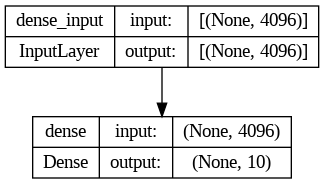

In [ ]:
# Number of features in the flattened input data
input_shape = X_train_scaled.shape[1]  # For example, if your input data is already flattened

# Number of unique classes in the labels
num_classes = len(np.unique(train_labels))

# Define the model
model4 = Sequential([
    # Input layer is implicit within the Dense layer by specifying input_shape
    Dense(num_classes, activation='softmax', input_shape=(input_shape,))
])

# Plot the model architecture
plot_model(model4, show_shapes=True, show_layer_names=True)

In [ ]:
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                40970     
                                                                 
Total params: 40970 (160.04 KB)
Trainable params: 40970 (160.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
train_labels.dtype

dtype('<U20')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)

In [ ]:
train_labels_encoded.dtype

dtype('int64')

In [ ]:
train_labels = to_categorical(train_labels_encoded, num_classes=10)
test_labels = to_categorical(test_labels_encoded, num_classes=10)

# define the model
model4 = Sequential([
    Dense(10, activation='softmax', input_shape=(X_train_scaled.shape[1],))
])

# Compile the model
model4.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])


S4=model4.fit(X_train_scaled, train_labels,
          batch_size=64,
          epochs=15,
          verbose=2,
          validation_data=(X_test_scaled, test_labels))


loss, accuracy = model4.evaluate(X_test_scaled, test_labels, verbose=0)
print(f"Classification accuracy on the test data: {accuracy}")

Epoch 1/15
254/254 - 2s - loss: 2.7294 - accuracy: 0.0881 - val_loss: 2.4651 - val_accuracy: 0.1799 - 2s/epoch - 9ms/step
Epoch 2/15
254/254 - 1s - loss: 2.3466 - accuracy: 0.1915 - val_loss: 2.2679 - val_accuracy: 0.1940 - 1s/epoch - 4ms/step
Epoch 3/15
254/254 - 1s - loss: 2.2211 - accuracy: 0.1961 - val_loss: 2.1996 - val_accuracy: 0.1974 - 1s/epoch - 4ms/step
Epoch 4/15
254/254 - 1s - loss: 2.1760 - accuracy: 0.2021 - val_loss: 2.1746 - val_accuracy: 0.2015 - 1s/epoch - 5ms/step
Epoch 5/15
254/254 - 1s - loss: 2.1577 - accuracy: 0.2050 - val_loss: 2.1620 - val_accuracy: 0.2058 - 1s/epoch - 4ms/step
Epoch 6/15
254/254 - 2s - loss: 2.1465 - accuracy: 0.2092 - val_loss: 2.1529 - val_accuracy: 0.2091 - 2s/epoch - 8ms/step
Epoch 7/15
254/254 - 2s - loss: 2.1375 - accuracy: 0.2117 - val_loss: 2.1449 - val_accuracy: 0.2117 - 2s/epoch - 8ms/step
Epoch 8/15
254/254 - 1s - loss: 2.1299 - accuracy: 0.2140 - val_loss: 2.1379 - val_accuracy: 0.2123 - 1s/epoch - 5ms/step
Epoch 9/15
254/254 - 1s 

### S5:

- Implement a second deep learning model (M.4) adding an additional fully connected hidden layer (with an arbitrary number of nodes) to the previous model.

Q5.1: Plot the network architecture

Q5.2: What is the number of learnable parameters of the model?

Q5.3: Calculate classification accuracy on the test data.


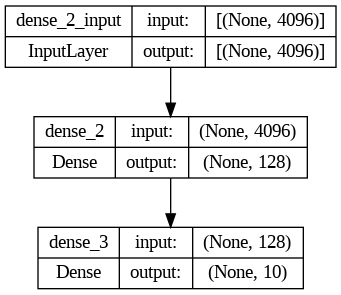

In [ ]:
input_shape = X_train_scaled.shape[1]
num_classes = 10

model5 = Sequential()
model5.add(Dense(128, activation='relu', input_shape=(input_shape,)))
model5.add(Dense(num_classes, activation='softmax'))

# Plot the model architecture
plot_model(model5, show_shapes=True, show_layer_names=True)

In [ ]:
model5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               524416    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 525706 (2.01 MB)
Trainable params: 525706 (2.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model
model5.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])


S5=model5.fit(X_train_scaled, train_labels,
          batch_size=64,
          epochs=15,
          verbose=2,
          validation_data=(X_test_scaled, test_labels))


loss, accuracy = model5.evaluate(X_test_scaled, test_labels, verbose=0)
print(f"Classification accuracy on the test data: {accuracy}")

Epoch 1/15
254/254 - 6s - loss: 2.5330 - accuracy: 0.1586 - val_loss: 2.3314 - val_accuracy: 0.1647 - 6s/epoch - 22ms/step
Epoch 2/15
254/254 - 4s - loss: 2.2664 - accuracy: 0.1787 - val_loss: 2.2342 - val_accuracy: 0.1852 - 4s/epoch - 14ms/step
Epoch 3/15
254/254 - 3s - loss: 2.1929 - accuracy: 0.1903 - val_loss: 2.1799 - val_accuracy: 0.1951 - 3s/epoch - 13ms/step
Epoch 4/15
254/254 - 4s - loss: 2.1452 - accuracy: 0.2030 - val_loss: 2.1419 - val_accuracy: 0.1945 - 4s/epoch - 15ms/step
Epoch 5/15
254/254 - 5s - loss: 2.1101 - accuracy: 0.2088 - val_loss: 2.1131 - val_accuracy: 0.2078 - 5s/epoch - 20ms/step
Epoch 6/15
254/254 - 4s - loss: 2.0831 - accuracy: 0.2147 - val_loss: 2.0909 - val_accuracy: 0.2112 - 4s/epoch - 15ms/step
Epoch 7/15
254/254 - 3s - loss: 2.0610 - accuracy: 0.2215 - val_loss: 2.0727 - val_accuracy: 0.2146 - 3s/epoch - 12ms/step
Epoch 8/15
254/254 - 3s - loss: 2.0422 - accuracy: 0.2256 - val_loss: 2.0557 - val_accuracy: 0.2259 - 3s/epoch - 12ms/step
Epoch 9/15
254/2

### S6:

- Implement a third deep learning model (M.5) adding two additional fully connected hidden layers (with arbitrary number of nodes) for a total of four, as well as drop-out layers to the previous model.

Q6.1: Plot the network architecture

Q6.2: What is the number of learnable parameters of the model?

Q6.3: Calculate classification accuracy on the test data.

Q6.4: Compare against previous models. Which model was the "best"? Why?

**The Random Forest model was the best among the models from S3 to S6 given its higher accuracy as well as ensemble learning method. Specifically, EuroSAT dataset is composed of satellite images with complex patterns. Therefore, random forest model is more able to capture its patterns and outperform the other models, especially given the fact that the current deep learning models with one or two hidden layers are insufficient to capture the complex hierarchical patterns in satellite images without more sophisticated architectures.**

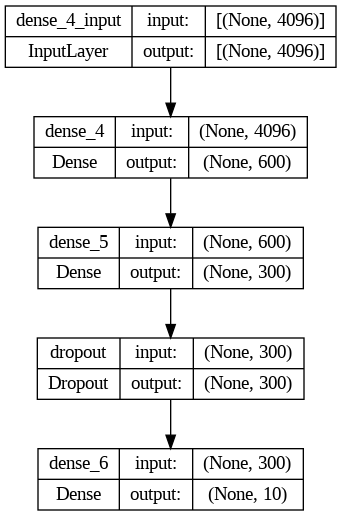

In [ ]:
input_shape = X_train_scaled.shape[1]
num_classes = 10

model6 = Sequential()
model6.add(Dense(600, activation='relu', input_shape=(input_shape,)))
model6.add(Dense(300, activation='relu'))
model6.add(Dropout(0.3))
model6.add(Dense(num_classes, activation='softmax'))

# Plot the model architecture
plot_model(model6, show_shapes=True, show_layer_names=True)

In [ ]:
model6.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 600)               2458200   
                                                                 
 dense_5 (Dense)             (None, 300)               180300    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                3010      
                                                                 
Total params: 2641510 (10.08 MB)
Trainable params: 2641510 (10.08 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model
model6.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])


S6=model6.fit(X_train_scaled, train_labels,
          batch_size=64,
          epochs=15,
          verbose=2,
          validation_data=(X_test_scaled, test_labels))


loss, accuracy = model6.evaluate(X_test_scaled, test_labels, verbose=0)
print(f"Classification accuracy on the test data: {accuracy}")

Epoch 1/15
254/254 - 17s - loss: 2.3841 - accuracy: 0.1610 - val_loss: 2.0772 - val_accuracy: 0.1952 - 17s/epoch - 66ms/step
Epoch 2/15
254/254 - 15s - loss: 2.1663 - accuracy: 0.1985 - val_loss: 1.9975 - val_accuracy: 0.2240 - 15s/epoch - 58ms/step
Epoch 3/15
254/254 - 14s - loss: 2.0845 - accuracy: 0.2187 - val_loss: 1.9526 - val_accuracy: 0.2400 - 14s/epoch - 55ms/step
Epoch 4/15
254/254 - 14s - loss: 2.0473 - accuracy: 0.2287 - val_loss: 1.9210 - val_accuracy: 0.2514 - 14s/epoch - 56ms/step
Epoch 5/15
254/254 - 14s - loss: 2.0052 - accuracy: 0.2387 - val_loss: 1.8969 - val_accuracy: 0.2921 - 14s/epoch - 57ms/step
Epoch 6/15
254/254 - 15s - loss: 1.9662 - accuracy: 0.2533 - val_loss: 1.8752 - val_accuracy: 0.2685 - 15s/epoch - 60ms/step
Epoch 7/15
254/254 - 15s - loss: 1.9437 - accuracy: 0.2551 - val_loss: 1.8579 - val_accuracy: 0.2783 - 15s/epoch - 59ms/step
Epoch 8/15
254/254 - 17s - loss: 1.9191 - accuracy: 0.2685 - val_loss: 1.8401 - val_accuracy: 0.3133 - 17s/epoch - 66ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(predictions, true_labels, model_name):
    print(f"{model_name} Accuracy: {accuracy_score(true_labels, predictions)}")
    print(f"{model_name} Precision: {precision_score(true_labels, predictions, average='weighted', zero_division=0)}")
    print(f"{model_name} Recall: {recall_score(true_labels, predictions, average='weighted')}")
    print(f"{model_name} F1 Score: {f1_score(true_labels, predictions, average='weighted')}")

    # Confusion Matrix
    print(f"{model_name} Confusion Matrix:\n{confusion_matrix(true_labels, predictions)}")

    # Classification Report
    print(f"{model_name} Classification Report:\n{classification_report(true_labels, predictions, zero_division=0)}")

In [ ]:
# Get category index from one-hot code
test_labels_indices = np.argmax(test_labels, axis=1)
# Use LabelEncoder to convert indexes back to category names
test_labels_names = label_encoder.inverse_transform(test_labels_indices)

evaluate_model(svm_pred, test_labels_names, "SVM")
evaluate_model(rf_pred, test_labels_names, "Random Forest")

SVM Accuracy: 0.31761006289308175
SVM Precision: 0.3107127211217211
SVM Recall: 0.31761006289308175
SVM F1 Score: 0.3014607450868927
SVM Confusion Matrix:
[[554  14 168  66  93  51 121  43  27  75]
 [  3 685  23   6   0  37   0   0  22 424]
 [262  62 244 110  32 127 106  49  92 116]
 [188  64 153 173  22  96  79  65  98  62]
 [198   3 110 101 342  25  71  92  35  23]
 [ 97  69 171  66   1 153  22  12  94 115]
 [303  13 172 104  63  60 148  57  42  38]
 [242  17 192 149  68 108 154 122  99  49]
 [132 134 157 109  18 125  57  40 133  95]
 [ 88 136  40   8   0  20   7   1  20 880]]
SVM Classification Report:
                      precision    recall  f1-score   support

          AnnualCrop       0.27      0.46      0.34      1212
              Forest       0.57      0.57      0.57      1200
HerbaceousVegetation       0.17      0.20      0.19      1200
             Highway       0.19      0.17      0.18      1000
          Industrial       0.54      0.34      0.42      1000
             P

### Convolutional deep learning models

### S7:

- Take the original RGB images and do not vectorize them. Use these images as the data input for the following models (M.6 and M.7).

- Implement a fourth CNN model (M.6) that includes the following layers: Conv2D, MaxPooling2D, Dropout, Flatten, Dense.

Q7.1: Plot the network architecture

Q7.2: What is the number of learnable parameters of the model?

Q7.3: Calculate classification accuracy on the test data.

Q7.4: Compare against previous models. Which model was the "best"? Why?

**The "best" model still seems to be the random forest model at the very first beginning, as the revised deep learning model in S7 slightly outperforms the other deep learning models. However, it is still far from the accuracy of the random forest model. The reason may be that the network architecture is not suitable enough. However, after I simplify the model's architecture, the deep learning model S77 outperforms better than any other the models so far. It further illustrates that the S77 model better captures key patterns in the dataset.**

In [ ]:
def process_dataset_rgb(base_path):
    data_matrix = []
    labels = []

    for class_dir in sorted(os.listdir(base_path)):  # Ensure consistent order
        class_path = os.path.join(base_path, class_dir)
        if os.path.isdir(class_path):
            for image_file in sorted(os.listdir(class_path)):
                if image_file.lower().endswith(('.jpg', '.jpeg')):
                    image_path = os.path.join(class_path, image_file)
                    with Image.open(image_path) as img:
                        img_array = np.array(img) / 255.0  # Scale pixel values to range [0, 1]
                        data_matrix.append(img_array)
                        labels.append(class_dir)

    return np.array(data_matrix), np.array(labels)

# Define the base paths for your training and test datasets
base_train_path = '/content/drive/My Drive/MUSA650/Data/EuroSAT/train'
base_test_path = '/content/drive/My Drive/MUSA650/Data/EuroSAT/test'

# Process the datasets
X_train, y_train = process_dataset_rgb(base_train_path)
X_test, y_test = process_dataset_rgb(base_test_path)


# Output the sizes of the datasets
print("Training Data Size:", X_train.shape, "Labels:", y_train)
print("Testing Data Size:", X_test.shape, "Labels:", y_test)

Training Data Size: (16218, 64, 64, 3) Labels: ['AnnualCrop' 'AnnualCrop' 'AnnualCrop' ... 'SeaLake' 'SeaLake' 'SeaLake']
Testing Data Size: (10812, 64, 64, 3) Labels: ['AnnualCrop' 'AnnualCrop' 'AnnualCrop' ... 'SeaLake' 'SeaLake' 'SeaLake']


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
def encode_labels(labels, num_classes=10):
    label_encoder = LabelEncoder()
    encoded = label_encoder.fit_transform(labels)
    one_hot = to_categorical(encoded, num_classes=num_classes)
    return one_hot

y_train_1hot = encode_labels(y_train)
y_test_1hot = encode_labels(y_test, num_classes=10)

In [ ]:
print('X_train shape:', X_train.shape)

X_train shape: (16218, 64, 64, 3)


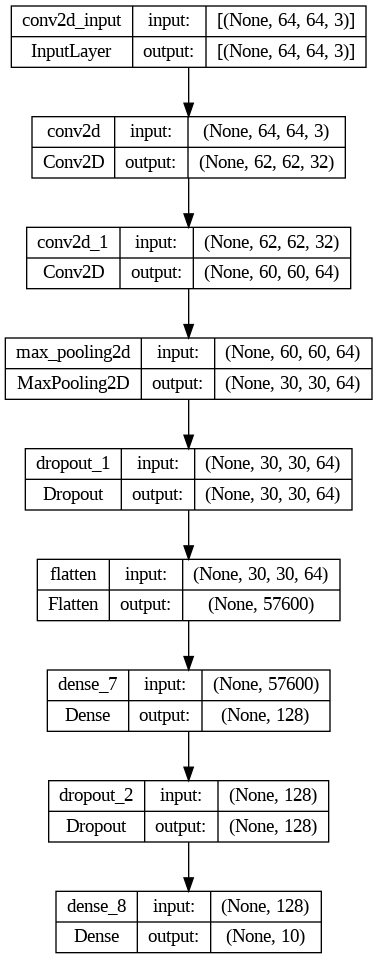

In [ ]:
input_shape = X_train.shape[1:]
num_classes = 10


model7 = Sequential()
model7.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model7.add(Conv2D(64, (3, 3), activation='relu'))
model7.add(MaxPooling2D(pool_size=(2, 2)))
model7.add(Dropout(0.25))
model7.add(Flatten())
model7.add(Dense(128, activation='relu'))
model7.add(Dropout(0.5))
model7.add(Dense(num_classes, activation='softmax'))


# Plot the model architecture
plot_model(model7, show_shapes=True, show_layer_names=True)

In [ ]:
model7.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 64)        0         
 D)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 64)        0         
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense_7 (Dense)             (None, 128)               7372928   
                                                      

In [ ]:
# Compile the model
model7.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])


S7=model7.fit(X_train, y_train_1hot,
          batch_size=64,
          epochs=15,
          verbose=2,
          validation_data=(X_test, y_test_1hot))


loss, accuracy = model7.evaluate(X_test, y_test_1hot, verbose=0)
print(f"Classification accuracy on the test data: {accuracy}")

Epoch 1/15
254/254 - 342s - loss: 2.2952 - accuracy: 0.1028 - val_loss: 2.2598 - val_accuracy: 0.1380 - 342s/epoch - 1s/step
Epoch 2/15
254/254 - 318s - loss: 2.2636 - accuracy: 0.1183 - val_loss: 2.2429 - val_accuracy: 0.1513 - 318s/epoch - 1s/step
Epoch 3/15
254/254 - 337s - loss: 2.2497 - accuracy: 0.1205 - val_loss: 2.2230 - val_accuracy: 0.1603 - 337s/epoch - 1s/step
Epoch 4/15
254/254 - 294s - loss: 2.2312 - accuracy: 0.1369 - val_loss: 2.1983 - val_accuracy: 0.1910 - 294s/epoch - 1s/step
Epoch 5/15
254/254 - 302s - loss: 2.2054 - accuracy: 0.1696 - val_loss: 2.1671 - val_accuracy: 0.2802 - 302s/epoch - 1s/step
Epoch 6/15
254/254 - 303s - loss: 2.1769 - accuracy: 0.2012 - val_loss: 2.1325 - val_accuracy: 0.2941 - 303s/epoch - 1s/step
Epoch 7/15
254/254 - 341s - loss: 2.1465 - accuracy: 0.2198 - val_loss: 2.0979 - val_accuracy: 0.3031 - 341s/epoch - 1s/step
Epoch 8/15
254/254 - 308s - loss: 2.1167 - accuracy: 0.2338 - val_loss: 2.0661 - val_accuracy: 0.3254 - 308s/epoch - 1s/step


In [ ]:
input_shape = X_train.shape[1:]
num_classes=10

model77 = Sequential()
model77.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model77.add(MaxPooling2D((2, 2)))
model77.add(Dropout(0.5))
model77.add(Flatten())
model77.add(Dense(num_classes, activation='softmax'))
model77.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model77.summary()

S77=model77.fit(X_train, y_train_1hot,
          batch_size=128,
          epochs=15,
          verbose=2,
          validation_data=(X_test, y_test_1hot))


loss, accuracy = model77.evaluate(X_test, y_test_1hot, verbose=0)
print(f"Classification accuracy on the test data: {accuracy}")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 64)        0         
 D)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 31, 31, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 61504)             0         
                                                                 
 dense_2 (Dense)             (None, 10)                615050    
                                                                 
Total params: 616842 (2.35 MB)
Trainable params: 616842 (2.35 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

### S8:

- Using RGB images from S7, implement a fifth deep learning model (M.7) targeting accuracy that will outperform all previous models. You are free to use any tools and techniques, as well as pre-trained models for transfer learning.

Q6.1: Describe the model you built, and why you chose it.

Q6.2: Calculate classification accuracy on the test data.

Q6.3: Compare against previous models. Which model was the "best"? Why?

**The pre-trained VGG16 model was the best and has an accuracy of 85%, far outperforms the others. This is due in fact to its effective architectures in the realm of deep learning for image recognition tasks.**

Q6.4: What are the two classes with the highest labeling error? Explain using data and showing mis-classified examples.

**From the classification report and analysis, it is evident that classes 3 (Highway) and 8 (River) have the highest labeling errors. This misclassification tendency can be attributed primarily to the visual similarities between these two classes in certain contexts:**

**1.Visual Similarity: Highways and rivers can appear remarkably similar in aerial or satellite images, especially when highways are curved or surrounded by greenery, making them resemble rivers. This similarity is exacerbated in urban settings where both highways and rivers can be integral, winding elements of the landscape.**

**2.Color Confusion: Rivers often carry a greyish hue, particularly in urban areas or during overcast weather, which can closely resemble the asphalt of highways. This color overlap can lead to further confusion for the model trying to distinguish between these two categories.**

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)

model8 = Model(inputs=base_model.input, outputs=predictions)

model8.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model8.summary()


58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [ ]:
S8=model8.fit(X_train, y_train_1hot,
          batch_size=64,
          epochs=10,
          verbose=2,
          validation_data=(X_test, y_test_1hot))

loss, accuracy = model8.evaluate(X_test, y_test_1hot, verbose=0)
print(f"Classification accuracy on the test data: {accuracy}")

Epoch 1/10
254/254 - 1261s - loss: 1.2941 - accuracy: 0.5477 - val_loss: 0.8326 - val_accuracy: 0.7480 - 1261s/epoch - 5s/step
Epoch 2/10
254/254 - 1224s - loss: 0.8070 - accuracy: 0.7297 - val_loss: 0.6886 - val_accuracy: 0.7711 - 1224s/epoch - 5s/step
Epoch 3/10
254/254 - 1211s - loss: 0.6791 - accuracy: 0.7737 - val_loss: 0.6053 - val_accuracy: 0.8067 - 1211s/epoch - 5s/step
Epoch 4/10
254/254 - 1224s - loss: 0.6115 - accuracy: 0.7974 - val_loss: 0.5593 - val_accuracy: 0.8155 - 1224s/epoch - 5s/step
Epoch 5/10
254/254 - 1264s - loss: 0.5641 - accuracy: 0.8143 - val_loss: 0.5209 - val_accuracy: 0.8322 - 1264s/epoch - 5s/step
Epoch 6/10
254/254 - 1227s - loss: 0.5238 - accuracy: 0.8266 - val_loss: 0.4976 - val_accuracy: 0.8367 - 1227s/epoch - 5s/step
Epoch 7/10
254/254 - 1221s - loss: 0.4960 - accuracy: 0.8361 - val_loss: 0.4780 - val_accuracy: 0.8426 - 1221s/epoch - 5s/step
Epoch 8/10
254/254 - 1276s - loss: 0.4658 - accuracy: 0.8430 - val_loss: 0.4641 - val_accuracy: 0.8456 - 1276s/

In [ ]:
CNN_pred=model8.predict(X_test)

338/338 [==============================] - 535s 2s/step


In [ ]:
CNN_pred

array([[3.3971537e-02, 6.7077070e-02, 2.0700281e-03, ..., 4.2338093e-04,
        8.5669504e-03, 8.7462348e-01],
       [9.9288583e-01, 2.4749635e-04, 7.6454598e-05, ..., 3.8188071e-05,
        4.3411762e-03, 1.4286569e-03],
       [9.9431658e-01, 1.7930547e-06, 1.5035739e-06, ..., 1.3859705e-05,
        3.5828729e-03, 5.0281404e-05],
       ...,
       [2.6489126e-03, 4.5309603e-02, 1.3642367e-03, ..., 2.3881845e-05,
        5.2618934e-04, 9.4858229e-01],
       [4.4559040e-03, 9.4637319e-02, 2.4497390e-03, ..., 4.1655054e-05,
        6.5617118e-04, 8.9535379e-01],
       [1.0669123e-02, 4.6688363e-02, 4.9870568e-03, ..., 3.4622200e-05,
        7.4933335e-04, 9.3513209e-01]], dtype=float32)

In [ ]:
y_test.dtype

dtype('<U20')

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_test_encoded

array([0, 0, 0, ..., 9, 9, 9])

In [ ]:
y_test_encoded = np.argmax(y_test_encoded, axis=1)

array(['AnnualCrop', 'AnnualCrop', 'AnnualCrop', ..., 'SeaLake',
       'SeaLake', 'SeaLake'], dtype='<U20')

In [ ]:
CNN_pred_classes = np.argmax(CNN_pred, axis=1)
CNN_pred_classes

array([9, 0, 0, ..., 9, 9, 9])

In [ ]:
evaluate_model(CNN_pred_classes, y_test_encoded, "CNN")

CNN Accuracy: 0.8509988901220865
CNN Precision: 0.8508538199908735
CNN Recall: 0.8509988901220865
CNN F1 Score: 0.8498481884019746
CNN Confusion Matrix:
[[1068   16    3   23    0   31   23    0   30   18]
 [   1 1126   11    0    0   40    0    2    2   18]
 [   2   95  951   21    2   21   51   48    8    1]
 [  39    0   25  729   26   13   50   17  101    0]
 [   2    0    1    9  936    0   17   32    3    0]
 [  10   93   20    5    0  609   16    8   28   11]
 [  48    3   65   30   25   22  752   33   22    0]
 [   0    2   11    4   32    0   17 1134    0    0]
 [  32    5   22   81    7   46   15    9  778    5]
 [   8   52    2    0    0   15    0    0    5 1118]]
CNN Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1212
           1       0.81      0.94      0.87      1200
           2       0.86      0.79      0.82      1200
           3       0.81      0.73      0.77      1000
           4      

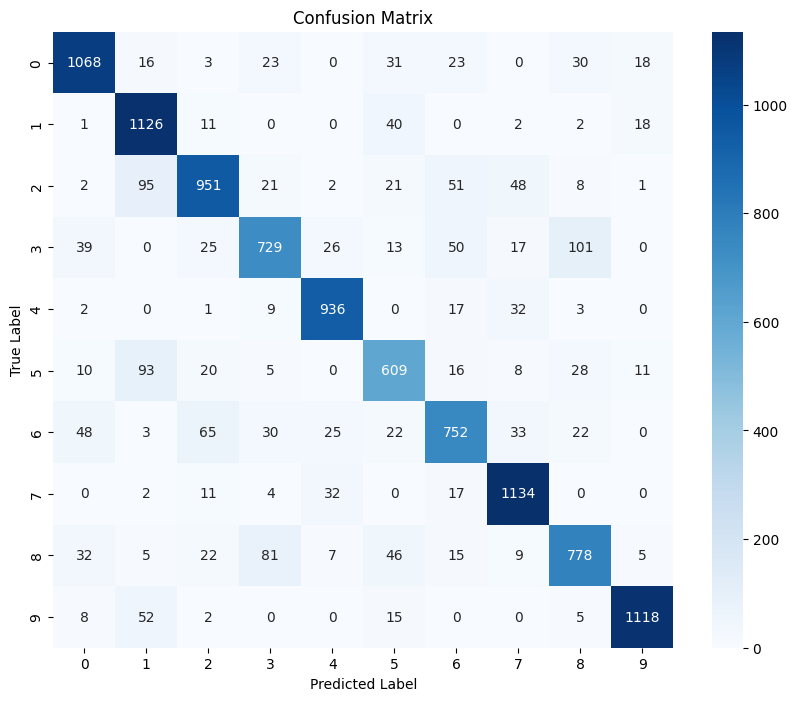

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_encoded, CNN_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # annot=True show actual numbers, fmt='d' with integer formatting

plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

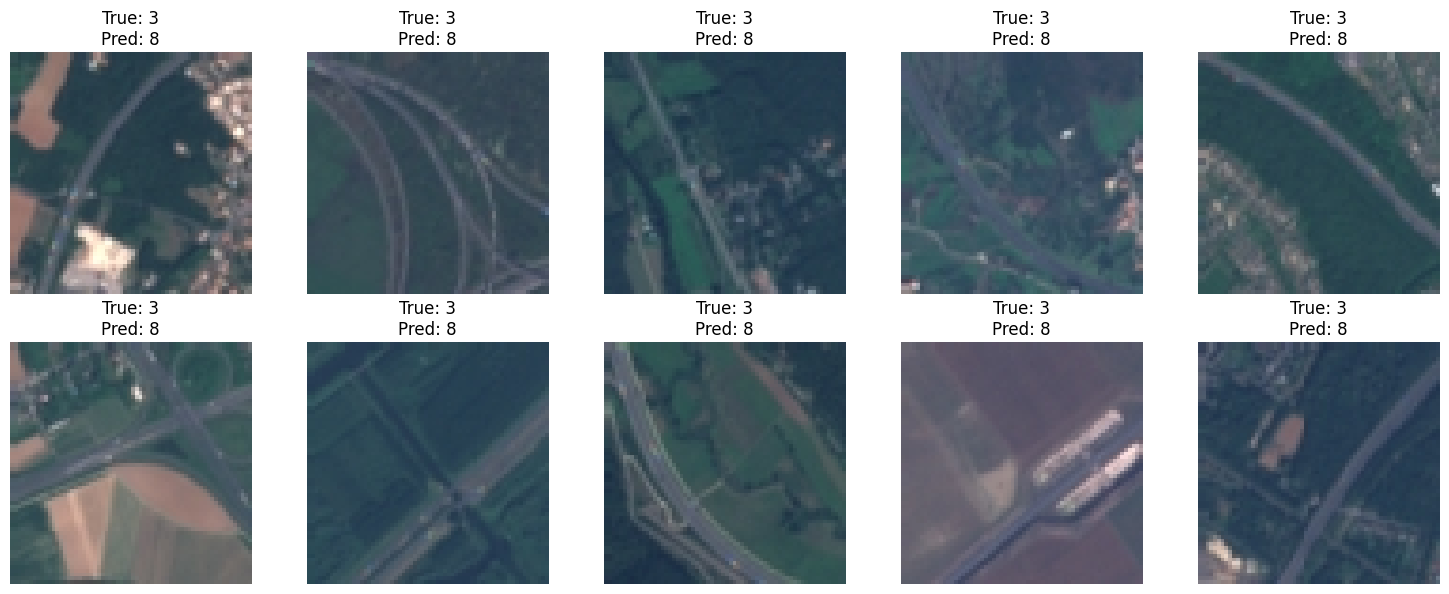

In [ ]:
import matplotlib.pyplot as plt

# Find the indices of class 3 that were misclassified as class 8
misclassified_indices = np.where((y_test_encoded == 3) & (CNN_pred_classes == 8))[0]

# Setup the subplot grid
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))  # Adjust figsize to increase size of each subplot

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot the misclassified examples
for i, ax in enumerate(axes):
    if i < len(misclassified_indices):  # Check if there are enough images to display
        misclassified_index = misclassified_indices[i]
        ax.imshow(X_test[misclassified_index], cmap='gray')  # Assuming X_test is grayscale
        ax.set_title(f'True: 3\nPred: 8')
        ax.axis('off')  # Hide axes
    else:
        ax.axis('off')  # Hide unused subplots

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()


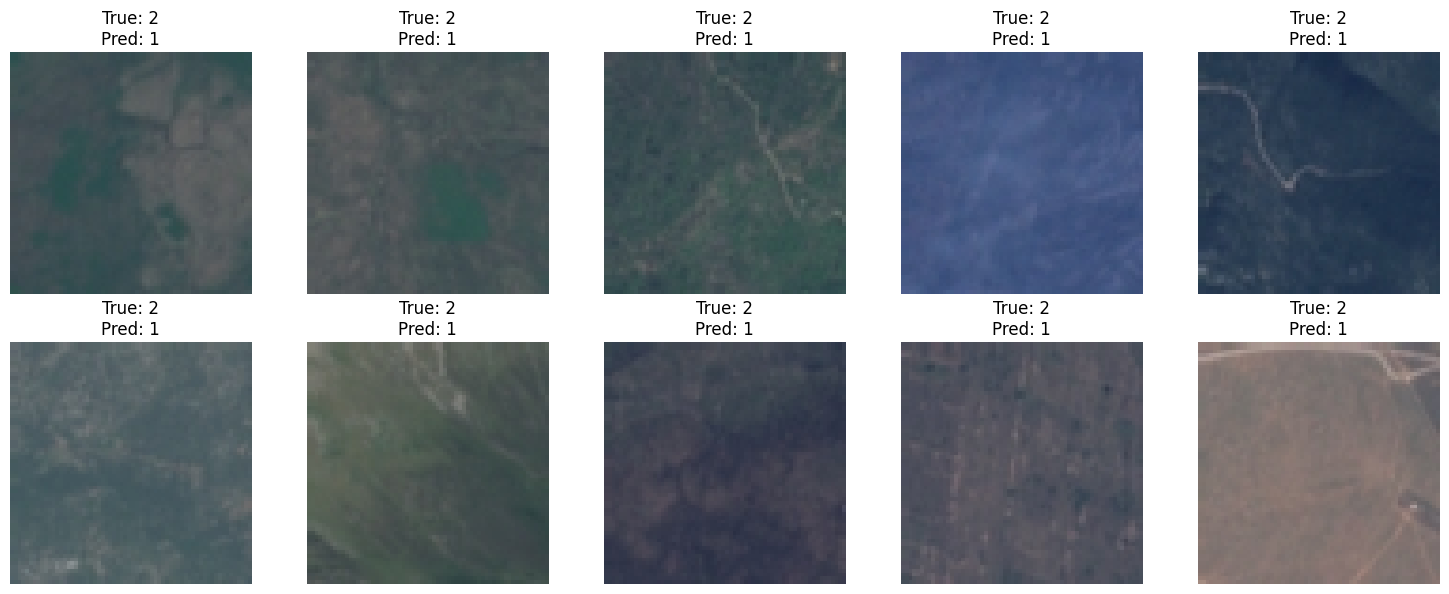

In [ ]:
# Find the indices of class 3 that were misclassified as class 8
misclassified_indices = np.where((y_test_encoded == 2) & (CNN_pred_classes == 1))[0]

# Setup the subplot grid
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))  # Adjust figsize to increase size of each subplot

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot the misclassified examples
for i, ax in enumerate(axes):
    if i < len(misclassified_indices):  # Check if there are enough images to display
        misclassified_index = misclassified_indices[i]
        ax.imshow(X_test[misclassified_index], cmap='gray')  # Assuming X_test is grayscale
        ax.set_title(f'True: 2\nPred: 1')
        ax.axis('off')  # Hide axes
    else:
        ax.axis('off')  # Hide unused subplots

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()


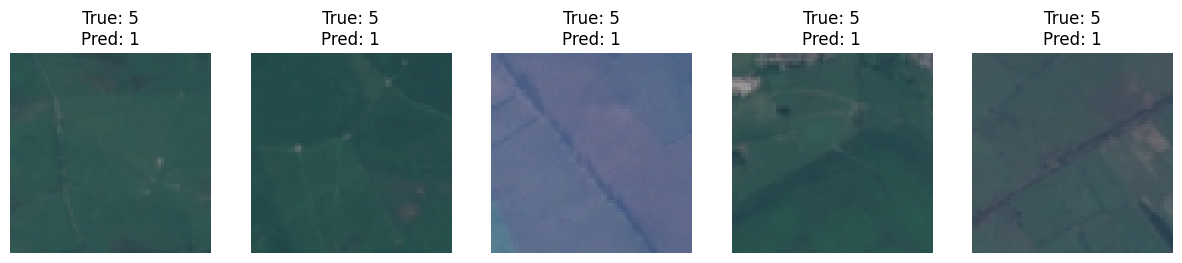

In [ ]:
# Find the indices of class 2 that were misclassified as class 1
misclassified_indices = np.where((y_test_encoded == 5) & (CNN_pred_classes == 1))[0]

# Plot the misclassified examples
plt.figure(figsize=(15, 8))

for i, misclassified_index in enumerate(misclassified_indices[:5], 1):  # Just show the first 10 examples
    plt.subplot(1, 5, i)
    plt.imshow(X_test[misclassified_index], cmap='gray')  # Assuming X_test is grayscale
    plt.title(f'True: 5\nPred: 1')
    plt.axis('off')
plt.show()

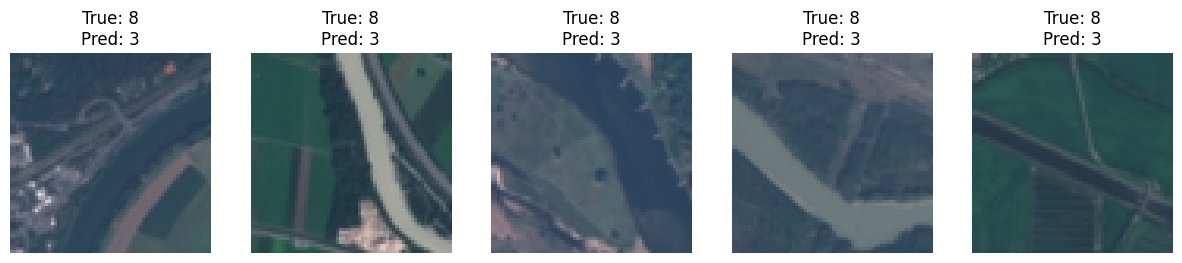

In [ ]:
# Find the indices of class 2 that were misclassified as class 1
misclassified_indices = np.where((y_test_encoded == 8) & (CNN_pred_classes == 3))[0]

# Plot the misclassified examples
plt.figure(figsize=(15, 8))

for i, misclassified_index in enumerate(misclassified_indices[:5], 1):  # Just show the first 10 examples
    plt.subplot(1, 5, i)
    plt.imshow(X_test[misclassified_index], cmap='gray')  # Assuming X_test is grayscale
    plt.title(f'True: 8\nPred: 3')
    plt.axis('off')
plt.show()